In [11]:
# utility modules
import glob
import os
import sys
import re
import io

# the usual suspects
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import matplotlib.image as mpimg

# modules you'll need if you're downloading the data
from icepyx import icesat2data as ipd
import shutil
import geopandas as gpd

import fiona
import pyproj
import h5py

# # run matplotlib in 'widget' mode
# %matplotlib widget
# %load_ext autoreload
# %autoreload 2

In [20]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default
sys.path.append(os.path.join(os.getcwd(), '..'))
from readers.get_ATL03_x_atc import get_ATL03_x_atc
from readers.read_HDF5_ATL03 import read_HDF5_ATL03
from readers.read_HDF5_ATL13 import read_HDF5_ATL13
from readers.read_HDF5_ATL06 import atl06_to_dict

ATL03_file = 'ATL03_20190128163325_04770206_003_01.h5'
ATL06_file = 'ATL06_20190128163325_04770206_003_01.h5'
ATL13_file = 'ATL13_20190128160153_04770201_003_01.h5'
IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams = read_HDF5_ATL03(ATL03_file)
IS2_atl13_mds, IS2_atl13_attrs, IS2_atl13_beams = read_HDF5_ATL13(ATL13_file)

beam = ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']

# D3 = IS2_atl03_mds[beam]
# D6 = atl06_to_dict(ATL06_file, beam, index=None, epsg=3031)
# D13 = IS2_atl13_mds[beam]

# WRONG CODE! Differnet length of path 1,2,3
# D6 = {}
# D6i = atl06_to_dict(ATL06_file, 'gt1l', index=None, epsg=3031)
# for index in D6i:
#     sum6 = np.zeros(D6i[index].size)
#     for i in beam:
#         sum6 = sum6 + atl06_to_dict(ATL06_file, i, index=None, epsg=3031)[index]
#     D6[index] = sum6/len(beam)

# D13 = {}
# D13i = IS2_atl13_mds['gt1l']
# for index in D13i:
#     sum13 = np.zeros(D13i[index].size)
#     for i in beam:
#         sum13 = sum13 + IS2_atl13_mds[i][index]
#     D13[index] = sum13/len(beam)

# D6 = {}
# D13 = {} 
# for i in beam:
#     D6[i] = {}
#     D13[i] = {}
#     data = atl06_to_dict(ATL06_file, i, index=None, epsg=3031)
#     ext = (data['longitude'][:]>88.1) & (data['longitude'][:]<88.35) 
#     D6[i]['lon'] = data['longitude'][ext]
#     D6[i]['lat'] = data['latitude'][ext]
#     D6[i]['h_normal'] = data['h_li'][ext]-data['geoid_h'][ext]
#     D6[i]['thickness'] = data['h_li'][ext]-data['dem_h'][ext]
    
#     extt = (IS2_atl13_mds[i]['segment_lon'][:]>88.1) & (IS2_atl13_mds[i]['segment_lon'][:]<88.35)
#     D13[i]['lon'] = IS2_atl13_mds[i]['segment_lon'][extt]
#     D13[i]['lat'] = IS2_atl13_mds[i]['segment_lat'][extt]
#     D13[i]['h_normal'] = IS2_atl13_mds[i]['ht_water_surf'][extt] - IS2_atl13_mds[i]['err_ht_water_surf'][extt]
#     D13[i]['ice_flag'] = IS2_atl13_mds[i]['ice_flag'][extt]

In [21]:
# extent = [88.1, 88.35, 27.7, 28.5]

# request = cimgt.OSM()

# fig = plt.figure(figsize=(9, 13))
# ax = plt.axes(projection=request.crs)
# cmap = cm.viridis_r
# cmap.set_bad(alpha=0.0)
# for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
#     sc = ax.scatter(D6[gtx]['lon'],D6[gtx]['lat'],
#         c=D6[gtx]['h_normal'], s=0.1, cmap=cmap, transform=ccrs.PlateCarree())  
# cbar = fig.colorbar(sc,ax=ax,extend='both',extendfrac=0.0375, pad=0.03, drawedges=False)
# cbar.solids.set_rasterized(True)
# cbar.ax.tick_params(which='both', length=16, width=1, direction='in')
# cbar.ax.set_ylabel('Elevation above WGS84 Ellipsoid')
# cbar.ax.set_xlabel('m')
# cbar.ax.xaxis.set_label_coords(0.50,1.04)      
# gl = ax.gridlines(draw_labels=True, alpha=0.2)
# # gl.xlabels_top = gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax.set_extent(extent)
# ax.add_image(request, 10)

# plt.show()

In [22]:
# fig = plt.figure(figsize=(9, 13))
# ax = plt.axes(projection=request.crs)
# cmap = cm.viridis_r
# cmap.set_bad(alpha=0.0)
# for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
#     flag = (D6[gtx]['thickness'][:]>0)
#     sc = ax.scatter(D6[gtx]['lon'][flag],D6[gtx]['lat'][flag],
#         c=D6[gtx]['thickness'][flag], s=0.1, cmap=cmap, transform=ccrs.PlateCarree())  
# cbar = fig.colorbar(sc,ax=ax,extend='both',extendfrac=0.0375, pad=0.03, drawedges=False)
# cbar.solids.set_rasterized(True)
# cbar.ax.tick_params(which='both', length=16, width=1, direction='in')
# cbar.ax.set_ylabel('Land ice thickness')
# cbar.ax.set_xlabel('m')
# cbar.ax.xaxis.set_label_coords(0.50,1.04)      
# gl = ax.gridlines(draw_labels=True, alpha=0.2)
# # gl.xlabels_top = gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax.set_extent(extent)
# ax.add_image(request, 10)

# plt.show()

In [23]:
# for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
#     flag = (D6[gtx]['thickness'][:]>0)
#     plt.plot(D6[gtx]['thickness'][flag])  
# plt.show()

In [28]:
D6 = {}
D13 = {} 
for i in beam:
    D6[i] = {}
    D13[i] = {}
    data = atl06_to_dict(ATL06_file, i, index=None, epsg=3031)
    ext = (data['longitude'][:]>88.1) & (data['longitude'][:]<88.35) & (data['latitude'][:]<28.05)
    D6[i]['lon'] = data['longitude'][ext]
    D6[i]['lat'] = data['latitude'][ext]
    D6[i]['h_normal'] = data['h_li'][ext]-data['geoid_h'][ext]
    D6[i]['thickness'] = data['h_li'][ext]-data['dem_h'][ext]
    
    extt = (IS2_atl13_mds[i]['segment_lon'][:]>88.1) & (IS2_atl13_mds[i]['segment_lon'][:]<88.35) & (IS2_atl13_mds[i]['segment_lat'][:]>88.1) & (IS2_atl13_mds[i]['segment_lat'][:]>28.35) & (IS2_atl13_mds[i]['segment_lat'][:]<28.46)
    D13[i]['lon'] = IS2_atl13_mds[i]['segment_lon'][extt]
    D13[i]['lat'] = IS2_atl13_mds[i]['segment_lat'][extt]
    D13[i]['h_ortho'] = IS2_atl13_mds[i]['ht_ortho'][extt]
    D13[i]['ice_flag'] = IS2_atl13_mds[i]['ice_flag'][extt]

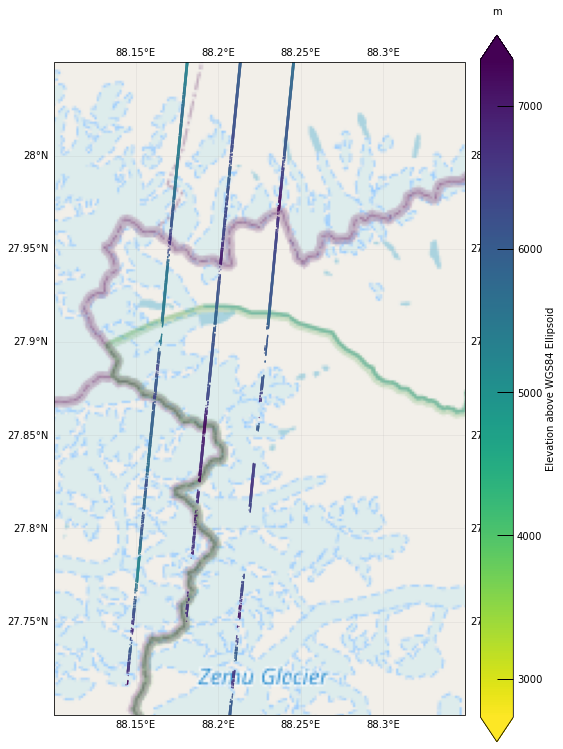

In [29]:
extent = [88.1, 88.35, 27.7, 28.05]

request = cimgt.OSM()

fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
cmap = cm.viridis_r
cmap.set_bad(alpha=0.0)
for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
    sc = ax.scatter(D6[gtx]['lon'],D6[gtx]['lat'],
        c=D6[gtx]['h_normal'], s=0.1, cmap=cmap, transform=ccrs.PlateCarree())  
cbar = fig.colorbar(sc,ax=ax,extend='both',extendfrac=0.0375, pad=0.03, drawedges=False)
cbar.solids.set_rasterized(True)
cbar.ax.tick_params(which='both', length=16, width=1, direction='in')
cbar.ax.set_ylabel('Elevation above WGS84 Ellipsoid')
cbar.ax.set_xlabel('m')
cbar.ax.xaxis.set_label_coords(0.50,1.04)      
gl = ax.gridlines(draw_labels=True, alpha=0.2)
# gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
ax.add_image(request, 10)

plt.show()

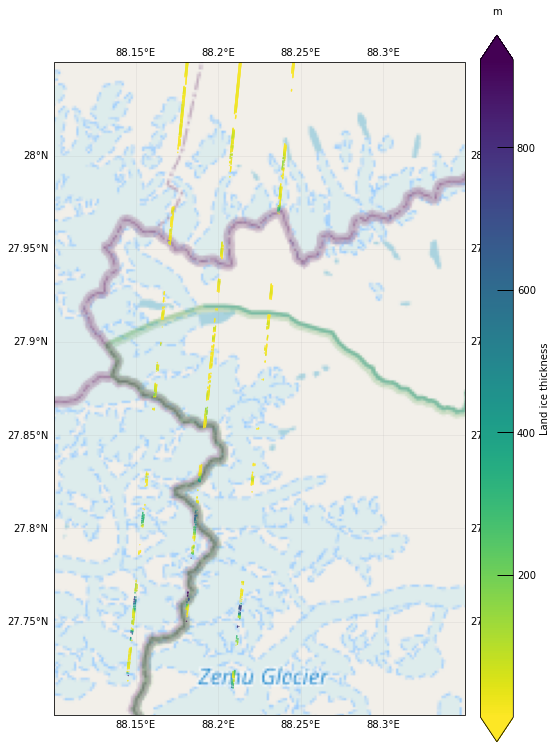

In [30]:
fig = plt.figure(figsize=(9, 13))
ax = plt.axes(projection=request.crs)
cmap = cm.viridis_r
cmap.set_bad(alpha=0.0)
for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
    flag = (D6[gtx]['thickness'][:]>0)
    sc = ax.scatter(D6[gtx]['lon'][flag],D6[gtx]['lat'][flag],
        c=D6[gtx]['thickness'][flag], s=0.1, cmap=cmap, transform=ccrs.PlateCarree())  
cbar = fig.colorbar(sc,ax=ax,extend='both',extendfrac=0.0375, pad=0.03, drawedges=False)
cbar.solids.set_rasterized(True)
cbar.ax.tick_params(which='both', length=16, width=1, direction='in')
cbar.ax.set_ylabel('Land ice thickness')
cbar.ax.set_xlabel('m')
cbar.ax.xaxis.set_label_coords(0.50,1.04)      
gl = ax.gridlines(draw_labels=True, alpha=0.2)
# gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
ax.add_image(request, 10)

plt.show()

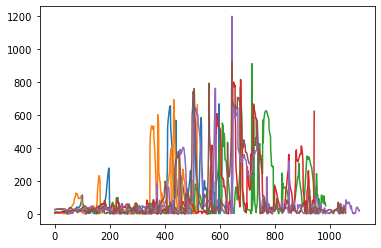

In [31]:
for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
    flag = (D6[gtx]['thickness'][:]>0)
    plt.plot(D6[gtx]['thickness'][flag])  
plt.show()